In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly import tools

In [3]:
data = pd.read_excel('Volve production data.xlsx')

In [4]:
data.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE    ...      AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000    ...                  %    0.00000   
1            0.0                    NaN    ...                  %    0.00000   
2            0.0                    NaN    ...                  %    0.00000   
3            0.0                    NaN    ...                  %    0.00000   
4            0.0              310.37614    ...                  %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [5]:
df = data[['DATEPRD', 'NPD_WELL_BORE_NAME', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
          'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 
          'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']]

In [6]:
data.groupby('NPD_WELL_BORE_NAME').sum()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  \
NPD_WELL_BORE_NAME                                                          
15/9-F-1 C                     5524130      2551854882          275500784   
15/9-F-11                      8245870      3985135305          430239160   
15/9-F-12                     17110544     10453711152         1128593024   
15/9-F-14                     16352656     10453711152         1128593024   
15/9-F-15 D                    7128642      3345461226          361179312   
15/9-F-4                      18940611     11380725459         1228674408   
15/9-F-5                      19072314     11308890402         1220919024   

                    ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
NPD_WELL_BORE_NAME                                         
15/9-F-1 C             9983.53315          183272.862798   
15/9-F-11             26006.21614          271162.380252   
15/9-F-12             65204.06928          246223.670095   
15/9-F-14             62773.67519          710877.683553   
15/9-F-15 D           17824.83278          221062.144637   
15/9-F-4              64267.16117               0.000000   
15/9-F-5              60829.85308               0.000000   

                    AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
NPD_WELL_BORE_NAME                                            
15/9-F-1 C                      77959.493534  143057.398026   
15/9-F-11                      120921.733869  211936.660726   
15/9-F-12                      101540.832797  258536.068732   
15/9-F-14                      290158.064528  587591.902921   
15/9-F-15 D                    102343.339583  182056.474562   
15/9-F-4                            0.000000       0.000000   
15/9-F-5                            0.000000       0.000000   

                    AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P      AVG_WHP_P  \
NPD_WELL_BORE_NAME                                                       
15/9-F-1 C                   0.000000      22080.444662   40215.464773   
15/9-F-11                21459.582784      42137.081224   59277.965605   
15/9-F-12                52559.300440     208594.108262  146605.528181   
15/9-F-14                26667.383769     198456.220430  126917.513616   
15/9-F-15 D              13654.771500       9765.172139   39005.670075   
15/9-F-4                     0.000000          0.000000       0.000000   
15/9-F-5                  2873.592542      11015.122858    3411.715021   

                        AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
NPD_WELL_BORE_NAME                                                             
15/9-F-1 C           30145.149910   24355.151821     177709.33  2.644092e+07   
15/9-F-11            78907.369394   28080.355445    1147849.10  1.743105e+08   
15/9-F-12           240274.715812   58958.399301    4579609.55  6.675423e+08   
15/9-F-14           235626.863900   47171.672255    3942233.39  5.780095e+08   
15/9-F-15 D          27968.658873   16730.819297     148518.56  2.250535e+07   
15/9-F-4                 0.000000       0.000000          0.00  0.000000e+00   
15/9-F-5              6521.556290     209.458899      41160.68  6.561826e+06   

                    BORE_WAT_VOL   BORE_WI_VOL  
NPD_WELL_BORE_NAME                              
15/9-F-1 C             207302.39  0.000000e+00  
15/9-F-11             1090806.27  0.000000e+00  
15/9-F-12             6833320.37  0.000000e+00  
15/9-F-14             7121249.74  0.000000e+00  
15/9-F-15 D             52366.40  0.000000e+00  
15/9-F-4                    0.00  1.624073e+07  
15/9-F-5                13533.18  1.408941e+07

In [7]:
df = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-14']

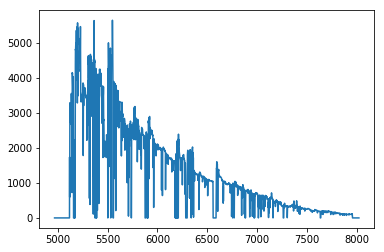

In [8]:
df['BORE_OIL_VOL'].plot()

In [9]:
df.head()

DATEPRD NPD_WELL_BORE_NAME  AVG_DOWNHOLE_PRESSURE  \
4967 2008-02-12          15/9-F-14                    0.0   
4968 2008-02-13          15/9-F-14                    0.0   
4969 2008-02-14          15/9-F-14                    0.0   
4970 2008-02-15          15/9-F-14                    0.0   
4971 2008-02-16          15/9-F-14                    0.0   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_CHOKE_SIZE_P  AVG_WHP_P  \
4967                       0.0            0.0               NaN        0.0   
4968                       0.0            0.0               NaN        0.0   
4969                       0.0            0.0               NaN        0.0   
4970                       0.0            0.0               NaN        0.0   
4971                       0.0            0.0               NaN        0.0   

      AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
4967        0.0        0.05885           0.0           0.0           0.0   
4968        0.0        0.06768           0.0           0.0           0.0   
4969        0.0        0.04950           0.0           0.0           0.0   
4970        0.0        0.06640           0.0           0.0           0.0   
4971        0.0        0.10479           0.0           0.0           0.0   

      BORE_WI_VOL  
4967          NaN  
4968          NaN  
4969          NaN  
4970          NaN  
4971          NaN

In [10]:
df.describe()

AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            3050.000000               3050.000000    3050.000000   
mean              233.074650                 95.133792     192.653083   
std                64.923764                 25.846815      57.736985   
min                 0.000000                  0.000000       0.000000   
25%               237.493045                 99.620673     180.749433   
50%               246.776063                101.007540     204.247625   
75%               261.970976                105.049314     229.632848   
max               334.656140                106.772733     302.109760   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       2860.000000  3056.000000  3056.000000    3056.000000   
mean          69.390287    41.530600    77.103031      15.435757   
std           31.064575    22.719568    25.615703      19.965154   
min            0.000000     0.000000     0.000000       0.000000   
25%           43.014155    31.020474    81.223317       2.665658   
50%           71.012952    33.545751    86.963304       7.177533   
75%          100.000000    49.080514    88.538931      21.173839   
max          100.000000   125.718570    93.509584     125.718570   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count   3056.000000    3056.000000   3056.000000          0.0  
mean    1289.997837  189139.248043   2330.251878          NaN  
std     1298.358922  184204.114106   1462.934595          NaN  
min        0.000000       0.000000    -59.190000          NaN  
25%      209.862500   31304.035000    695.592500          NaN  
50%      880.785000  142362.865000   2965.715000          NaN  
75%     2033.697500  305327.862500   3444.147500          NaN  
max     5644.370000  789974.730000   5691.770000          NaN

In [11]:
df.head()

DATEPRD NPD_WELL_BORE_NAME  AVG_DOWNHOLE_PRESSURE  \
4967 2008-02-12          15/9-F-14                    0.0   
4968 2008-02-13          15/9-F-14                    0.0   
4969 2008-02-14          15/9-F-14                    0.0   
4970 2008-02-15          15/9-F-14                    0.0   
4971 2008-02-16          15/9-F-14                    0.0   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_CHOKE_SIZE_P  AVG_WHP_P  \
4967                       0.0            0.0               NaN        0.0   
4968                       0.0            0.0               NaN        0.0   
4969                       0.0            0.0               NaN        0.0   
4970                       0.0            0.0               NaN        0.0   
4971                       0.0            0.0               NaN        0.0   

      AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
4967        0.0        0.05885           0.0           0.0           0.0   
4968        0.0        0.06768           0.0           0.0           0.0   
4969        0.0        0.04950           0.0           0.0           0.0   
4970        0.0        0.06640           0.0           0.0           0.0   
4971        0.0        0.10479           0.0           0.0           0.0   

      BORE_WI_VOL  
4967          NaN  
4968          NaN  
4969          NaN  
4970          NaN  
4971          NaN

In [12]:
df.iloc[:,9:12].head()

BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL
4967           0.0           0.0           0.0
4968           0.0           0.0           0.0
4969           0.0           0.0           0.0
4970           0.0           0.0           0.0
4971           0.0           0.0           0.0

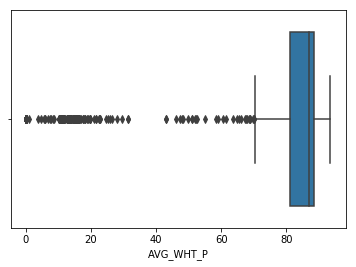

In [13]:
import seaborn as sns
sns.boxplot(df["AVG_WHT_P"])

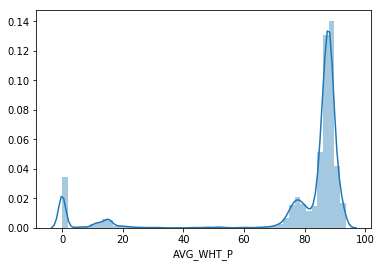

In [14]:
sns.distplot(df["AVG_WHT_P"])

In [15]:
df[df['AVG_DOWNHOLE_PRESSURE'] < 110].count()

DATEPRD                     205
NPD_WELL_BORE_NAME          205
AVG_DOWNHOLE_PRESSURE       205
AVG_DOWNHOLE_TEMPERATURE    205
AVG_DP_TUBING               205
AVG_CHOKE_SIZE_P             71
AVG_WHP_P                   205
AVG_WHT_P                   205
DP_CHOKE_SIZE               205
BORE_OIL_VOL                205
BORE_GAS_VOL                205
BORE_WAT_VOL                205
BORE_WI_VOL                   0
dtype: int64

In [16]:
df[df["AVG_WHT_P"] < 20]["BORE_OIL_VOL"].value_counts()

0.00     321
51.61      1
Name: BORE_OIL_VOL, dtype: int64

In [17]:
df[df['AVG_DOWNHOLE_PRESSURE'] < 1]["BORE_OIL_VOL"].value_counts()

0.00       186
3941.13      1
2141.69      1
2519.31      1
2485.03      1
2606.40      1
50.65        1
2652.06      1
3873.72      1
2492.65      1
799.20       1
2560.92      1
1006.27      1
651.67       1
2063.32      1
3975.77      1
Name: BORE_OIL_VOL, dtype: int64

In [18]:
df[df["BORE_OIL_VOL"] == 3941.13]

DATEPRD NPD_WELL_BORE_NAME  AVG_DOWNHOLE_PRESSURE  \
5391 2009-04-13          15/9-F-14                    0.0   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_CHOKE_SIZE_P  AVG_WHP_P  \
5391                       0.0      77.487499         36.929849  77.487499   

      AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
5391  78.890691      44.836729       3941.13     540977.58           7.7   

      BORE_WI_VOL  
5391          NaN

In [19]:
df[(df['AVG_DOWNHOLE_PRESSURE']) < 1 & (df['BORE_OIL_VOL'] > 1)]["BORE_OIL_VOL"]

5383    3873.72
5388      50.65
5390    2063.32
5391    3941.13
5392    3975.77
5393     651.67
5696    1006.27
5697    2652.06
5698    2606.40
5699    2141.69
5700    2560.92
5701    2519.31
5702    2492.65
5703    2485.03
6939     799.20
Name: BORE_OIL_VOL, dtype: float64

In [20]:
type(df["DATEPRD"])

pandas.core.series.Series

In [21]:
df["DATEPRD"].iloc[0]

Timestamp('2008-02-12 00:00:00')

In [22]:
df["DATEPRD"].iloc[-1]

Timestamp('2016-09-17 00:00:00')

In [23]:
trace = go.Scatter(x = df["DATEPRD"],
          y = df["BORE_OIL_VOL"])
data = [trace]
layout = dict(title = "Oil versus time",
             xaxis = dict(range = [df["DATEPRD"].iloc[0], df["DATEPRD"].iloc[-1]]))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [24]:
df[(df["DATEPRD"] >= '2016-01-01') & (df['DATEPRD'] <= '2016-09-17')]['BORE_OIL_VOL'].sum()

23029.129999999997

In [25]:
df[(df["DATEPRD"] >= '2016-01-01') & (df['DATEPRD'] <= '2016-09-17')].count()

DATEPRD                     261
NPD_WELL_BORE_NAME          261
AVG_DOWNHOLE_PRESSURE       261
AVG_DOWNHOLE_TEMPERATURE    261
AVG_DP_TUBING               261
AVG_CHOKE_SIZE_P            261
AVG_WHP_P                   261
AVG_WHT_P                   261
DP_CHOKE_SIZE               261
BORE_OIL_VOL                261
BORE_GAS_VOL                261
BORE_WAT_VOL                261
BORE_WI_VOL                   0
dtype: int64

In [26]:
df[(df["DATEPRD"] >= '2015-01-01') & (df['DATEPRD'] <= '2015-12-31')]['BORE_OIL_VOL'].sum()

78395.70999999999

In [27]:
df[(df["DATEPRD"] >= '2014-01-01') & (df['DATEPRD'] <= '2014-12-31')]['BORE_OIL_VOL'].sum()

151564.46000000002

In [28]:
df[(df["DATEPRD"] >= '2013-01-01') & (df['DATEPRD'] < '2013-12-31')]['BORE_OIL_VOL']

6679    1030.10
6680    1005.13
6681    1038.14
6682     985.25
6683     988.97
6684     984.48
6685     987.23
6686     990.40
6687     991.65
6688     987.96
6689     964.48
6690     977.72
6691     973.70
6692     975.98
6693     958.45
6694     965.56
6695     959.84
6696     963.72
6697     954.50
6698     951.88
6699     950.38
6700     956.77
6701     959.48
6702     960.51
6703     960.39
6704     956.42
6705     954.53
6706     956.26
6707     956.87
6708     965.22
         ...   
7003     700.13
7004     644.52
7005     642.92
7006     623.26
7007     609.47
7008     321.16
7009     577.46
7010     605.97
7011     308.67
7012      37.17
7013       0.00
7014      56.35
7015     111.55
7016     460.84
7017     552.54
7018     627.43
7019     649.17
7020     629.00
7021     628.24
7022     388.08
7023     589.05
7024     632.50
7025     628.71
7026     628.16
7027     646.65
7028     534.96
7029     262.78
7030     615.33
7031     627.72
7032     626.64
Name: BORE_OIL_VOL, Leng

In [29]:
df.drop('BORE_WI_VOL', axis = 1, inplace = True)

In [30]:
df.drop(df.loc[df['AVG_DOWNHOLE_PRESSURE'] < 100].index, inplace = True)

In [31]:
df.describe()

AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            2845.000000               2845.000000    2845.000000   
mean              249.758260                101.950515     205.937786   
std                19.162124                  4.849927      30.344711   
min               117.499290                 19.174870      34.750100   
25%               241.236049                 99.688213     187.695937   
50%               248.252232                101.449030     206.363181   
75%               263.417140                105.099829     230.105818   
max               334.656140                106.772733     302.109760   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       2789.000000  2851.000000  2851.000000    2851.000000   
mean          70.852611    43.928170    82.100300      15.177861   
std           29.864180    21.042244    17.048706      20.350147   
min            0.000000     0.000000     0.000000       0.003760   
25%           43.304868    31.384905    84.487009       2.579594   
50%           74.135336    34.701386    87.203027       5.733214   
75%          100.000000    51.348951    88.635036      18.801790   
max          100.000000   125.718570    93.509584     125.718570   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  
count   2851.000000    2851.000000   2851.000000  
mean    1369.244020  200837.585002   2487.629614  
std     1295.827767  183474.376192   1377.924331  
min        0.000000       0.000000    -59.190000  
25%      271.780000   41013.685000   1613.575000  
50%      963.190000  153135.160000   3038.400000  
75%     2108.885000  316998.505000   3473.585000  
max     5644.370000  789974.730000   5691.770000

In [32]:
df.drop(df.loc[df['BORE_OIL_VOL'] < 100].index, inplace = True)

In [33]:
df.drop(df.loc[df['BORE_GAS_VOL'] < 100].index, inplace = True)

In [34]:
df.drop(df.loc[df['BORE_WAT_VOL'] < 100].index, inplace = True)

In [35]:
df.drop(df.loc[df['AVG_CHOKE_SIZE_P'] < 20].index, inplace = True)

In [36]:
df.drop(df.loc[df['AVG_WHP_P'] < 10].index, inplace = True)

In [37]:
df.drop('NPD_WELL_BORE_NAME', axis =1, inplace = True)

In [38]:
df.head()

DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
5318 2009-01-30             257.442241                105.339191   
5330 2009-02-11             261.481233                105.364799   
5339 2009-02-20             264.386001                105.410873   
5341 2009-02-22             266.709086                105.395959   
5342 2009-02-23             266.667137                105.410516   

      AVG_DP_TUBING  AVG_CHOKE_SIZE_P   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
5318     163.294586         35.298817   94.147654  73.616443      61.049726   
5330     164.352071         34.697693   97.129162  80.237200      65.804801   
5339     166.214057         34.779443   98.171944  78.439751      64.987169   
5341     166.273529         34.054792  100.435557  80.121769      67.330436   
5342     166.513059         34.395363  100.154078  81.010145      66.986427   

      BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  
5318       4535.43     649388.07        298.19  
5330       4379.88     629307.34        143.54  
5339       4509.07     638750.17        108.74  
5341       4319.02     612912.62        106.60  
5342       4417.66     625514.01        117.37

In [39]:
df.reset_index(inplace = True)

In [40]:
df.set_index(np.arange(len(df)))

index    DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0      5318 2009-01-30             257.442241                105.339191   
1      5330 2009-02-11             261.481233                105.364799   
2      5339 2009-02-20             264.386001                105.410873   
3      5341 2009-02-22             266.709086                105.395959   
4      5342 2009-02-23             266.667137                105.410516   
5      5344 2009-02-25             269.706405                105.357897   
6      5345 2009-02-26             268.343139                105.427656   
7      5346 2009-02-27             268.747547                105.437540   
8      5347 2009-02-28             269.144046                105.443266   
9      5348 2009-03-01             269.559586                105.449827   
10     5349 2009-03-02             270.001543                105.455045   
11     5354 2009-03-07             281.304566                105.221213   
12     5358 2009-03-11             273.076737                105.141984   
13     5371 2009-03-24             242.677458                105.202065   
14     5421 2009-05-14             222.226339                105.193422   
15     5423 2009-05-16             222.999367                105.216569   
16     5424 2009-05-17             223.101070                105.234605   
17     5425 2009-05-18             223.292172                105.253521   
18     5426 2009-05-19             223.370832                105.268957   
19     5427 2009-05-20             223.581746                105.285753   
20     5428 2009-05-21             223.789333                105.303454   
21     5429 2009-05-22             223.495121                105.326792   
22     5430 2009-05-23             223.556182                105.348455   
23     5431 2009-05-24             223.968050                105.363448   
24     5432 2009-05-25             225.185911                105.369835   
25     5433 2009-05-26             225.618269                105.380871   
26     5434 2009-05-27             226.015684                105.393553   
27     5435 2009-05-28             226.489223                105.403795   
28     5436 2009-05-29             229.913023                105.377716   
29     5437 2009-05-30             230.225384                105.353225   
...     ...        ...                    ...                       ...   
2335   7924 2016-06-11             266.804859                100.079564   
2336   7926 2016-06-13             267.820925                100.062436   
2337   7927 2016-06-14             269.681434                100.037590   
2338   7928 2016-06-15             269.712972                100.050111   
2339   7929 2016-06-16             269.708590                100.050940   
2340   7930 2016-06-17             269.734249                100.072911   
2341   7931 2016-06-18             269.682609                100.080522   
2342   7932 2016-06-19             269.651436                100.091385   
2343   7933 2016-06-20             269.603839                 99.807531   
2344   7934 2016-06-21             269.607006                100.110880   
2345   7935 2016-06-22             269.584184                100.120501   
2346   7936 2016-06-23             269.554766                100.129653   
2347   7937 2016-06-24             269.568351                100.140088   
2348   7938 2016-06-25             269.518669                100.149725   
2349   7939 2016-06-26             269.484548                100.159206   
2350   7940 2016-06-27             269.761665                100.167002   
2351   7941 2016-06-28             269.876875                100.173231   
2352   7942 2016-06-29             269.827597                100.185413   
2353   7943 2016-06-30             269.826607                100.195309   
2354   7944 2016-07-01             269.892647                100.203321   
2355   7945 2016-07-02             269.793879                100.216914   
2356   7946 2016-07-03         

In [41]:
df.drop("index", axis = 1, inplace = True)

In [42]:
df.head()

DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
0 2009-01-30             257.442241                105.339191     163.294586   
1 2009-02-11             261.481233                105.364799     164.352071   
2 2009-02-20             264.386001                105.410873     166.214057   
3 2009-02-22             266.709086                105.395959     166.273529   
4 2009-02-23             266.667137                105.410516     166.513059   

   AVG_CHOKE_SIZE_P   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0         35.298817   94.147654  73.616443      61.049726       4535.43   
1         34.697693   97.129162  80.237200      65.804801       4379.88   
2         34.779443   98.171944  78.439751      64.987169       4509.07   
3         34.054792  100.435557  80.121769      67.330436       4319.02   
4         34.395363  100.154078  81.010145      66.986427       4417.66   

   BORE_GAS_VOL  BORE_WAT_VOL  
0     649388.07        298.19  
1     629307.34        143.54  
2     638750.17        108.74  
3     612912.62        106.60  
4     625514.01        117.37

In [43]:
df.describe()

AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            2365.000000               2365.000000    2365.000000   
mean              249.094249                102.097207     209.738696   
std                14.471301                  3.347366      22.442530   
min               135.625829                 54.637708     103.139736   
25%               241.724487                 99.734007     197.387834   
50%               247.564175                101.140437     208.745700   
75%               261.779017                105.051777     230.242463   
max               281.304566                106.772733     239.836523   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       2365.000000  2365.000000  2365.000000    2365.000000   
mean          78.480354    39.355552    87.223126       9.519099   
std           24.810999    12.613337     3.397897      11.112251   
min           20.302786    27.185420    48.186737       1.450701   
25%           55.848976    31.275033    86.251289       2.363251   
50%           97.916667    32.841734    87.744552       4.132290   
75%          100.000000    42.231621    88.862977      11.312569   
max          100.000000   115.061175    93.509584      82.889579   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  
count   2365.000000    2365.000000   2365.000000  
mean    1217.037564  180380.409552   2968.531260  
std     1052.866562  149356.183973    934.556182  
min      100.330000    5928.540000    100.160000  
25%      322.410000   49848.460000   2694.000000  
50%      950.380000  151088.070000   3203.300000  
75%     1876.970000  285954.060000   3541.830000  
max     5644.370000  786328.360000   5691.770000

In [72]:
trace1 = go.Scatter(x = df['DATEPRD'],
                  y = df['AVG_DOWNHOLE_PRESSURE'],
                  name = "BHP")
trace2 = go.Scatter(x = df['DATEPRD'],
                  y = (df['AVG_DOWNHOLE_TEMPERATURE']+20),
                  name = "Tem")
trace3 = go.Scatter(x = df['DATEPRD'],
                  y = df['AVG_DP_TUBING'],
                  name = "DP tubing")
trace4 = go.Scatter(x = df['DATEPRD'],
                  y = df['AVG_CHOKE_SIZE_P'],
                  name = "Choke size")
trace5 = go.Scatter(x = df['DATEPRD'],
                  y = df['AVG_WHP_P'],
                  name = "WHP")
trace6 = go.Scatter(x = df['DATEPRD'],
                  y = (df['BORE_OIL_VOL']/100),
                  name = "Oil/100")
trace7 = go.Scatter(x = df['DATEPRD'],
                  y = (df['BORE_GAS_VOL']/2000),
                  name = "Gas/500")
data = [trace1, trace2, trace3, trace4, trace5, trace6,trace7]
layout = {"title" : "ABC"
         }
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [45]:

#trace1 = go.Scatter(x = df['DATEPRD'],
                  #y = df['AVG_CHOKE_SIZE_P'],
                  #name = "Choke size")
trace2 = go.Scatter(x = df['DATEPRD'],
                  y = (df['BORE_OIL_VOL']),
                  name = "Oil rate")
data = [trace2]
layout = {"title": "Oil rate"}
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

(array([5.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 2.000e+01, 1.000e+01,
        1.800e+01, 1.000e+01, 1.500e+01, 1.900e+01, 2.600e+01, 2.600e+01,
        3.000e+01, 7.900e+01, 8.900e+01, 5.900e+01, 3.600e+01, 2.600e+01,
        4.900e+01, 2.800e+01, 1.500e+01, 2.200e+01, 1.500e+01, 2.000e+01,
        6.200e+01, 5.400e+01, 4.400e+01, 3.400e+01, 5.200e+01, 1.600e+01,
        3.200e+01, 2.800e+01, 1.400e+01, 1.900e+01, 2.000e+01, 3.100e+01,
        1.500e+01, 1.300e+01, 1.200e+01, 1.200e+01, 8.000e+00, 4.000e+00,
        6.000e+00, 1.000e+01, 7.000e+00, 9.000e+00, 5.000e+00, 7.000e+00,
        8.500e+01, 1.142e+03]),
 array([ 20.30278583,  21.89673012,  23.4906744 ,  25.08461868,
         26.67856297,  28.27250725,  29.86645153,  31.46039582,
         33.0543401 ,  34.64828438,  36.24222867,  37.83617295,
         39.43011723,  41.02406152,  42.6180058 ,  44.21195008,
         45.80589437,  47.39983865,  48.99378293,  50.58772722,
         52.1816715 ,  53.77561578,  55.36956007,  56.96

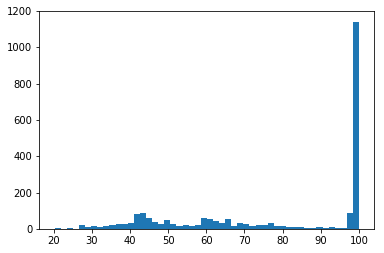

In [46]:
plt.hist(df['AVG_CHOKE_SIZE_P'], bins = 50)


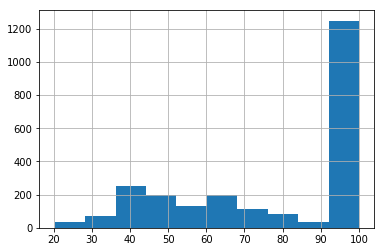

In [47]:
df['AVG_CHOKE_SIZE_P'].hist()

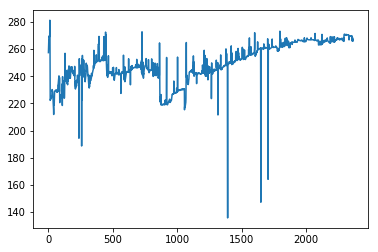

In [48]:
df['AVG_DOWNHOLE_PRESSURE'].plot()

In [49]:
trace1 = go.Scatter(x = df['DATEPRD'],
                  y = df['AVG_DOWNHOLE_PRESSURE'],
                  name = "BHP")
trace2 = go.Scatter(x = df['DATEPRD'],
                  y = (df['BORE_OIL_VOL']/50),
                  name = "OIl")
data = [trace1, trace2]
layout = {"title": "oil and choke"}
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [50]:
df[df['AVG_DOWNHOLE_PRESSURE'] < 180]

DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
1392 2013-09-29             135.625829                 54.760490   
1649 2014-06-26             174.793144                 66.573972   
1650 2014-06-27             147.200708                 54.637708   
1706 2014-08-28             164.074053                 62.440891   
1707 2014-08-29             177.673720                 68.205620   

      AVG_DP_TUBING  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
1392     103.139736        100.000000  32.486093  87.065948       2.992594   
1649     138.442110         51.030205  36.351034  81.300358       8.167492   
1650     111.757227         74.268164  35.443482  87.022581       5.757556   
1706     130.258451         76.428020  33.815602  85.062305       5.779091   
1707     146.859602         99.290564  30.814119  86.924010       2.017607   

      BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  
1392        665.70      99793.64       3783.79  
1649        183.67      27523.85       1383.83  
1650        296.83      44840.61       2273.92  
1706        290.24      50596.19       2400.19  
1707        374.02      67084.42       3095.61

In [51]:
from scipy.stats import pearsonr
pearsonr(df['AVG_DOWNHOLE_PRESSURE'], df['BORE_OIL_VOL'])

(-0.5838040167186263, 3.9467781222530085e-216)

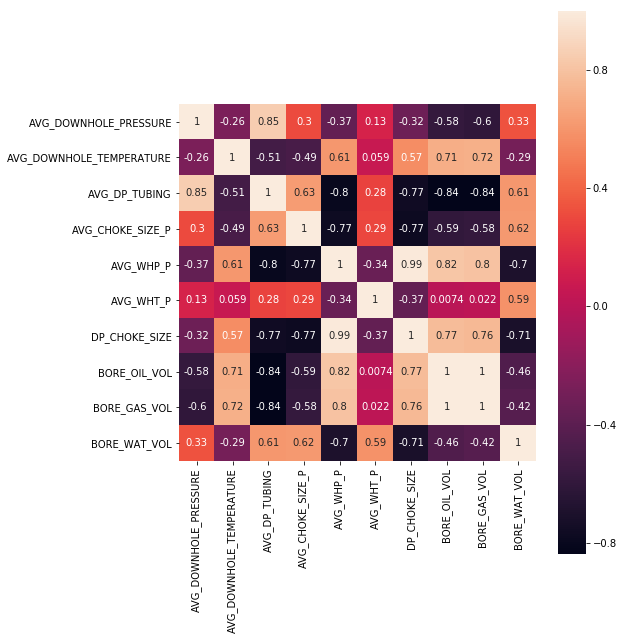

In [75]:
import seaborn as sns
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(corr_mat, square = True, annot = True)

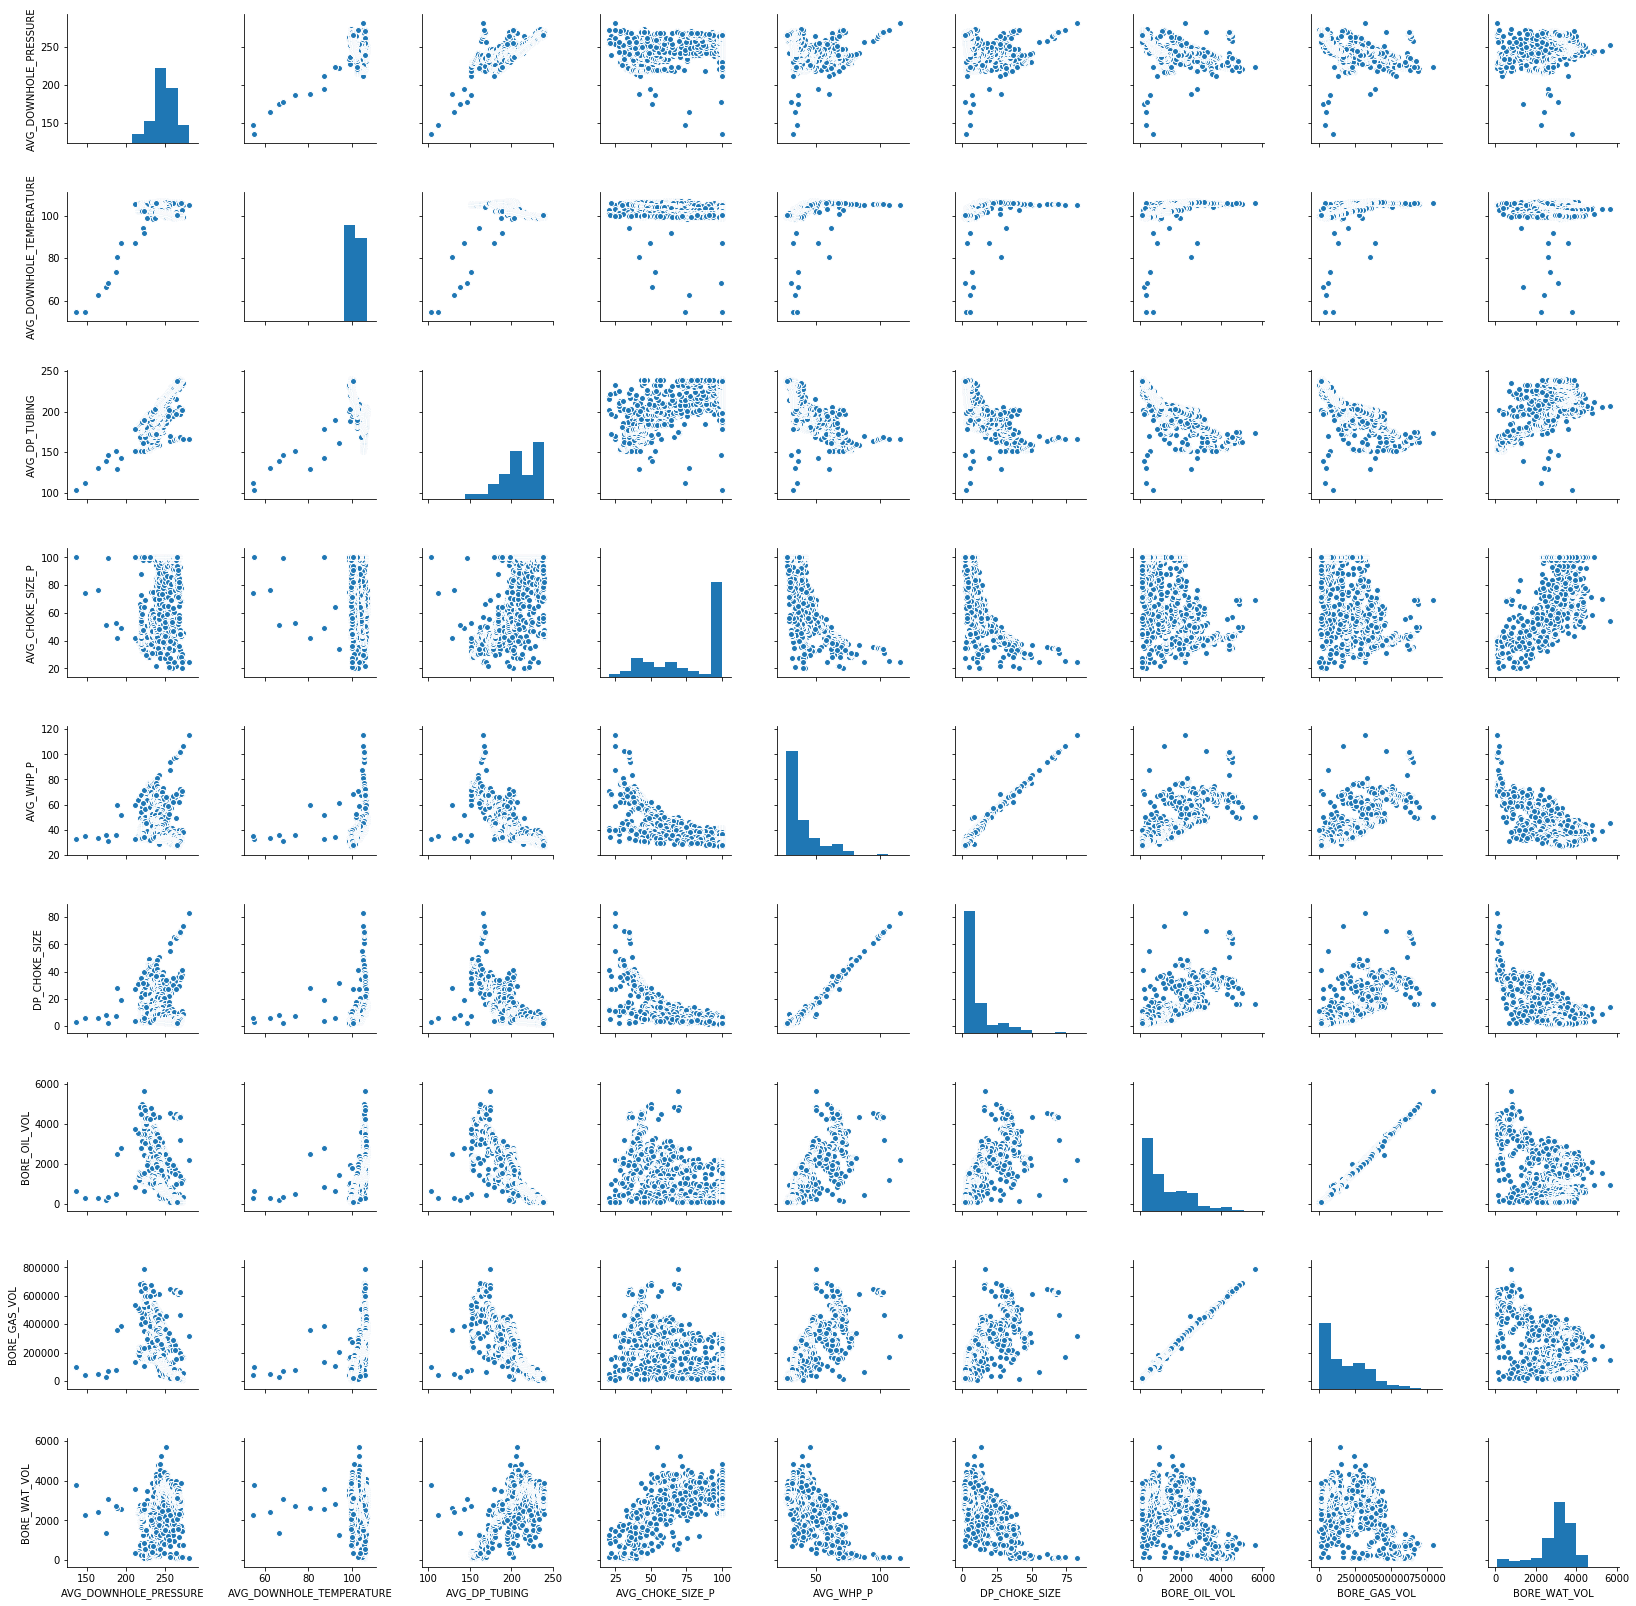

In [77]:
cols = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 
        'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'DP_CHOKE_SIZE',
       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
sns.pairplot(df[cols],size = 2.5)
plt.show()

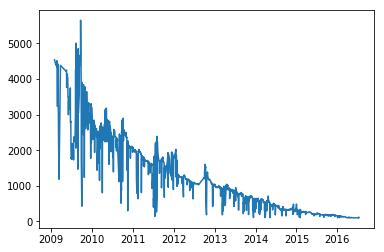

In [54]:
plt.plot(df['DATEPRD'], df['BORE_OIL_VOL'])

In [55]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly import tools

In [56]:
trace1 = go.Scatter(x = df['DATEPRD'],
                  y = df['BORE_OIL_VOL'],
                  name = 'Oil Production')
trace2 = go.Scatter(x = df['DATEPRD'],
                  y = df['BORE_GAS_VOL'],
                  name = 'Gas Production'
                   )
data = [trace1, trace2]
layout = {'title': "Oil and gas production versus years"}
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [57]:
#df.drop('DATEPRD', axis =1, inplace = True)

In [58]:
df.drop('NPD_WELL_BORE_NAME', axis =1, inplace = True)

ValueError: labels ['NPD_WELL_BORE_NAME'] not contained in axis

In [59]:
df.reset_index(inplace = True)

In [60]:
df.set_index(np.arange(len(df)))

index    DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0         0 2009-01-30             257.442241                105.339191   
1         1 2009-02-11             261.481233                105.364799   
2         2 2009-02-20             264.386001                105.410873   
3         3 2009-02-22             266.709086                105.395959   
4         4 2009-02-23             266.667137                105.410516   
5         5 2009-02-25             269.706405                105.357897   
6         6 2009-02-26             268.343139                105.427656   
7         7 2009-02-27             268.747547                105.437540   
8         8 2009-02-28             269.144046                105.443266   
9         9 2009-03-01             269.559586                105.449827   
10       10 2009-03-02             270.001543                105.455045   
11       11 2009-03-07             281.304566                105.221213   
12       12 2009-03-11             273.076737                105.141984   
13       13 2009-03-24             242.677458                105.202065   
14       14 2009-05-14             222.226339                105.193422   
15       15 2009-05-16             222.999367                105.216569   
16       16 2009-05-17             223.101070                105.234605   
17       17 2009-05-18             223.292172                105.253521   
18       18 2009-05-19             223.370832                105.268957   
19       19 2009-05-20             223.581746                105.285753   
20       20 2009-05-21             223.789333                105.303454   
21       21 2009-05-22             223.495121                105.326792   
22       22 2009-05-23             223.556182                105.348455   
23       23 2009-05-24             223.968050                105.363448   
24       24 2009-05-25             225.185911                105.369835   
25       25 2009-05-26             225.618269                105.380871   
26       26 2009-05-27             226.015684                105.393553   
27       27 2009-05-28             226.489223                105.403795   
28       28 2009-05-29             229.913023                105.377716   
29       29 2009-05-30             230.225384                105.353225   
...     ...        ...                    ...                       ...   
2335   2335 2016-06-11             266.804859                100.079564   
2336   2336 2016-06-13             267.820925                100.062436   
2337   2337 2016-06-14             269.681434                100.037590   
2338   2338 2016-06-15             269.712972                100.050111   
2339   2339 2016-06-16             269.708590                100.050940   
2340   2340 2016-06-17             269.734249                100.072911   
2341   2341 2016-06-18             269.682609                100.080522   
2342   2342 2016-06-19             269.651436                100.091385   
2343   2343 2016-06-20             269.603839                 99.807531   
2344   2344 2016-06-21             269.607006                100.110880   
2345   2345 2016-06-22             269.584184                100.120501   
2346   2346 2016-06-23             269.554766                100.129653   
2347   2347 2016-06-24             269.568351                100.140088   
2348   2348 2016-06-25             269.518669                100.149725   
2349   2349 2016-06-26             269.484548                100.159206   
2350   2350 2016-06-27             269.761665                100.167002   
2351   2351 2016-06-28             269.876875                100.173231   
2352   2352 2016-06-29             269.827597                100.185413   
2353   2353 2016-06-30             269.826607                100.195309   
2354   2354 2016-07-01             269.892647                100.203321   
2355   2355 2016-07-02             269.793879                100.216914   
2356   2356 2016-07-03         

In [61]:
df.drop('index', axis =1, inplace = True)

In [62]:
df.head()

DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
0 2009-01-30             257.442241                105.339191     163.294586   
1 2009-02-11             261.481233                105.364799     164.352071   
2 2009-02-20             264.386001                105.410873     166.214057   
3 2009-02-22             266.709086                105.395959     166.273529   
4 2009-02-23             266.667137                105.410516     166.513059   

   AVG_CHOKE_SIZE_P   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0         35.298817   94.147654  73.616443      61.049726       4535.43   
1         34.697693   97.129162  80.237200      65.804801       4379.88   
2         34.779443   98.171944  78.439751      64.987169       4509.07   
3         34.054792  100.435557  80.121769      67.330436       4319.02   
4         34.395363  100.154078  81.010145      66.986427       4417.66   

   BORE_GAS_VOL  BORE_WAT_VOL  
0     649388.07        298.19  
1     629307.34        143.54  
2     638750.17        108.74  
3     612912.62        106.60  
4     625514.01        117.37

In [63]:
df.to_csv('petroleum.csv')

In [64]:
def create_timeblock(X, Y, lookbacks = 1):
    dataX, dataY = [], []
    for i in range(len(X) - lookbacks):
        a = X[i:(i + lookbacks), :]
        dataX.append(a)
        dataY.append(Y[i+lookbacks, :])
    return np.array(dataX), np.array(dataY)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten, TimeDistributed, Reshape
from keras.utils import plot_model
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

In [ ]:
test_fraction = 0.15
X = df[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'DP_CHOKE_SIZE']]
Y = df[['BORE_OIL_VOL', 'BORE_GAS_VOL','BORE_WAT_VOL']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_fraction, shuffle = False)

In [ ]:
val_fraction = 0.15
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = val_fraction/(1-test_fraction), shuffle = False)

In [ ]:
scaler_x = MinMaxScaler()
x_train_norm = scaler_x.fit_transform(x_train.as_matrix())
x_val_norm = scaler_x.transform(x_val.as_matrix())
x_test_norm = scaler_x.transform(X_test.as_matrix())

scaler_y = MinMaxScaler()
y_train_norm = scaler_y.fit_transform(y_train.as_matrix())
y_val_norm = scaler_y.transform(y_val.as_matrix())
y_test_norm = scaler_y.transform(Y_test.as_matrix())


In [ ]:
# Create time blocks
x_train, y_train = create_timeblock(x_train_norm, y_train_norm, lookbacks=25)
x_val, y_val = create_timeblock(x_val_norm, y_val_norm, lookbacks=25)
x_test, y_test = create_timeblock(x_test_norm, y_test_norm, lookbacks=25)



In [ ]:
def run_model(x_train, y_train, x_val, y_val, epochs=500, batch_size=400, method='LSTM'):
    classifier = {'GRU' : GRU,
                  'LSTM' : LSTM,
                  'Simple RNN' : SimpleRNN}


    inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))

    X = classifier[method](8, return_sequences=True)(inputs)
    X = classifier[method](4, return_sequences=True)(X)
    
    X = TimeDistributed(Dense(256, activation='relu'))(X)
    X = Dropout(0.4)(X)
    
    out1 = Dense(1, activation='linear')(Flatten()(X))
    out2 = Dense(1, activation='linear')(Flatten()(X))
    out3 = Dense(1, activation='linear')(Flatten()(X))
    
    model = Model(input=inputs, output=[out1, out2, out3])
    
    #parallel_model = multi_gpu_model(model, gpus=8)

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','accuracy'])
    history = model.fit(x_train, [y_train[:, 0], y_train[:, 1], y_train[:, 2]], 
                        epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, [y_val[:, 0], y_val[:, 1], y_val[:, 2]]), 
                        verbose=1, shuffle=False)
    return model, history

In [ ]:
model_LSTM, history_LSTM = run_model(x_train, y_train, x_val, y_val, epochs=300, batch_size=32, method='LSTM')

In [ ]:
# Training
y_pred_train_pre = model_LSTM.predict(x_train)
y_pred_train_scaled = np.concatenate((y_pred_train_pre[0], y_pred_train_pre[1], y_pred_train_pre[2]), axis=1)
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)
y_train_act = scaler_y.inverse_transform(y_train)

# Dev
y_pred_dev_pre = model_LSTM.predict(x_dev)
y_pred_dev_scaled = np.concatenate((y_pred_dev_pre[0], y_pred_dev_pre[1], y_pred_dev_pre[2]), axis=1)
y_pred_dev = scaler_y.inverse_transform(y_pred_dev_scaled)
y_dev_act = scaler_y.inverse_transform(y_dev)

# Test
y_pred_test_pre = model_LSTM.predict(x_test)
y_pred_test_scaled = np.concatenate((y_pred_test_pre[0], y_pred_test_pre[1], y_pred_test_pre[2]), axis=1)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)
y_test_act = scaler_y.inverse_transform(y_test)

# Train-Dev-Test
y_act = np.concatenate([y_train_act, y_dev_act, y_test_act])
y_pred = np.concatenate([y_pred_train, y_pred_dev, y_pred_test])